In [242]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

### Categorical data: house price comparison

In [243]:
df_houses = pd.read_csv('Average-prices-Property-Type-2021-05.csv')
df_houses_subset = pd.read_csv('Average-prices-Property-Type-2021-05_subset.csv')
df_houses_wrangled = pd.read_csv('Average-prices-Property-Type-2021-05_wrangled.csv')

# Divide prices by 1000, to analyse prices in thousands
df_houses_wrangled['averagePrice'] = df_houses_wrangled['averagePrice'] / 1000

region = df_houses_wrangled['Region_Name']
property_type = df_houses_wrangled['propertyType']
avg_price = df_houses_wrangled['averagePrice']

n_property_types = len(property_type.unique())

df_houses_London = df_houses_wrangled[region == 'London']
df_houses_Newcastle = df_houses_wrangled[region == 'Newcastle upon Tyne']

prices_by_property_type_London = df_houses_London.groupby('propertyType')['averagePrice']
prices_by_property_type_Newcastle = df_houses_Newcastle.groupby('propertyType')['averagePrice']

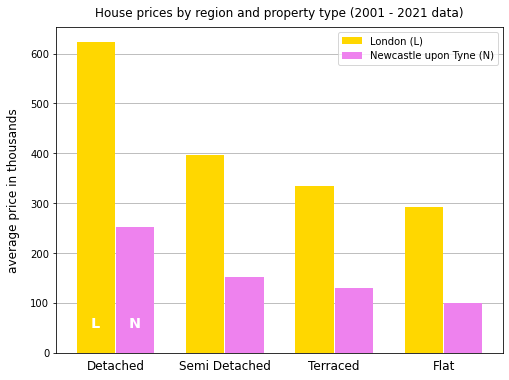

In [244]:
x_coords = pd.Series(range(n_property_types))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(axis='y', zorder=0)

bars_London = ax.bar(x_coords, prices_by_property_type_London.mean().sort_values(ascending=False), 
                     width, color='gold', zorder=5)
bars_Newcastle = ax.bar(x_coords + width + 0.01, prices_by_property_type_Newcastle.mean().sort_values(ascending=False), 
                        width, color='violet', zorder=5)

ax.set_title('House prices by region and property type (2001 - 2021 data)', pad=10)
ax.set_ylabel('average price in thousands', fontsize='large', labelpad=10)
ax.set_xticks(x_coords + (width + 0.01) / 2)
ax.tick_params(bottom=False)
ax.set_xticklabels(['Detached', 'Semi Detached', 'Terraced', 'Flat'], fontsize='large')

# Adjust to black and white printability and color blindness
ax.text(x_coords[0] - 0.05, 50, 'L', c='white', fontsize='x-large', fontweight='bold', zorder=10)
ax.text(x_coords[0] + width - 0.05, 50, 'N', c='white', fontsize='x-large', fontweight='bold', zorder=10)

plt.legend((bars_London[0], bars_Newcastle[0]), ('London (L)', 'Newcastle upon Tyne (N)'))

Description: Average house prices differ substantially depending on property type and region. Both London and Newcastle upon Tyne show the same trend in terms of property type - detached houses are the most expensive ones followed by semi detached then terraced and finally flat being the cheapest type of property. The average cost of flat is more than twice as low as the cost of detached property in the same region. Differences between regions are clearly visible as well - average property price in London is more than twice as high as in Newcastle upon Tyne for any given property type. Interesting fact - average flat price in London, which is about 300000, is higher than average detached house price in Newcastle upon Tyne (about 250000). 

### Numerical data: correlation of broadband upload and download speeds

In [245]:
df_broadband = pd.read_csv('202006_fixed_laua_performance_r01.csv')
df_broadband_wrangled = pd.read_csv('202006_fixed_laua_performance_wrangled.csv')

In [246]:
# Find regions that stand out
df_broadband_wrangled.sort_values(by='averageUpload', ascending=False)[:10]

,laua,laua_name,medDown,averageDown,medUpload,averageUpload
378,E06000014,YORK,53.3,147.1,10.0,98.1
181,E07000121,LANCASTER,40.1,102.0,10.0,61.2
293,E07000031,SOUTH LAKELAND,39.3,85.5,9.8,56.5
84,E07000163,CRAVEN,39.3,80.7,9.8,50.9
208,E06000042,MILTON KEYNES,54.8,80.2,10.0,37.0
81,E07000079,COTSWOLD,39.8,62.5,9.8,36.3
246,E06000031,PETERBOROUGH,63.7,98.4,10.0,29.9
355,E06000037,WEST BERKSHIRE,50.0,79.0,10.0,29.7
79,E07000150,CORBY,70.3,104.4,10.0,28.0
176,E06000010,"KINGSTON UPON HULL, CITY OF",75.0,163.0,20.0,24.0


In [247]:
avg_down_up_corr = round(df_broadband_wrangled['averageDown'].corr(df_broadband_wrangled['averageUpload']), 3)

#### York and Lancaster stand out as their average upload speeds are far from the regression line. We will highlight them by annotating scatter points of those two cities.

In [248]:
YORK_row = df_broadband_wrangled[df_broadband_wrangled['laua_name'] == 'YORK'].iloc[0]
LANCASTER_row = df_broadband_wrangled[df_broadband_wrangled['laua_name'] == 'LANCASTER'].iloc[0]

In [249]:
# Append imaginary value to extend regression line
avg_down_for_regr = df_broadband_wrangled['averageDown'].append(pd.Series([168]), ignore_index=True)

In [250]:
colours = [(down**2 + up**2) ** 0.5 for down, up in zip(df_broadband_wrangled['averageDown'], 
                                                        df_broadband_wrangled['averageUpload'])]

colour_bounds = [(0.78, 0.95, 1.0), (0.0, 0.10, 0.45)]
cmap = LinearSegmentedColormap.from_list('BluesUpdated', colour_bounds, N=20)

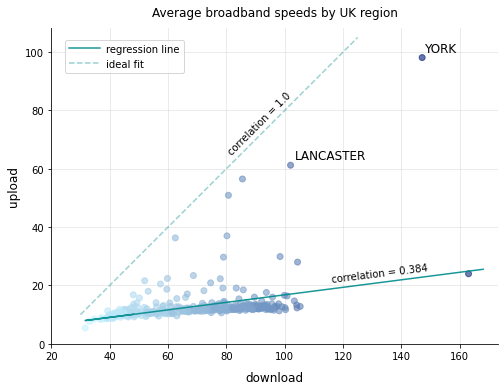

In [252]:
#gradient, intercept = np.polyfit(df_broadband_wrangled['averageDown'], df_broadband_wrangled['averageUpload'], 1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(alpha=0.3, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(20, df_broadband_wrangled['averageDown'].max() + 10)
ax.set_ylim(0, df_broadband_wrangled['averageUpload'].max() + 10)
ax.scatter(df_broadband_wrangled['averageDown'], df_broadband_wrangled['averageUpload'], c=colours, 
                            cmap=cmap, alpha=0.6, zorder=5)

# Plot the regression line
ax.plot(avg_down_for_regr, avg_down_for_regr * gradient + intercept, 
        zorder=10, color='darkcyan', label='regression line', alpha=0.9)

ax.plot([30, 50, 70, 90, 110, 125], [10, 30, 50, 70, 90, 105], color='darkcyan', alpha=0.4, 
        linestyle='--', label='ideal fit')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Highlight York and Lancaster
ax.annotate(YORK_row['laua_name'], (YORK_row['averageDown'] + 1, YORK_row['averageUpload'] + 2), fontsize='large')
ax.annotate(LANCASTER_row['laua_name'], (LANCASTER_row['averageDown'] + 1.5, LANCASTER_row['averageUpload'] + 2), fontsize='large')

# Annotate regression line and ideal fit with their respective correlations
ax.annotate('correlation = 1.0', (80.0, 65.0), rotation=45)
ax.annotate(f'correlation = {avg_down_up_corr}', (116.0, 21.0), rotation=7)

ax.set_title('Average broadband speeds by UK region', pad=12.0)
ax.set_ylabel('upload', fontsize='large', labelpad=5)
ax.set_xlabel('download', fontsize='large', labelpad=10)
ax.legend(handletextpad=0.6, handlelength=3.1, loc='upper left', bbox_to_anchor=(0.02, 0.98))

Description: While average broadband download speeds across different UK regions vary by a significant margin, upload speeds more or less are similar with the exception of some regions - upload speed of most regions lie somewhere between 8 and 15, which is visible by the density of points in the lower part of the plot. The calculated correlation between download and upload speeds across all regions is about 0.384. The regression line shows us how upload speeds depend on download speeds. The slope is not especially steep, however the general trend is noticeable - regions with higher broadband download speed tend to have higher upload speed as well. Some regions stand out as having proportionally much higher upload than download speed compared to the general trend. Two of those regions are highlighted in the plot - York and Lancaster. York has an average download speed of about 145, thus if it followed a general relationship between download and upload speeds (i.e. regression line), it would have an upload speed of about 25, however surprisingly it has an upload speed of about 100.

### Time series data: London Stock Exchange share price

In [253]:
df_stocks_wrangled = pd.read_csv('ftse_data_wrangled.csv')

# Use 2021 data
date_2021_mask = df_stocks_wrangled['date'] >= '2021-04-01'
df_stocks_wrangled = df_stocks_wrangled[date_2021_mask].reset_index(drop=True)

# Convert date to datetime
df_stocks_wrangled['date'] = pd.to_datetime(df_stocks_wrangled['date'])

close_price = df_stocks_wrangled['Close']
volume_per_week = df_stocks_wrangled.groupby(pd.Grouper(key='date', freq='W')).sum()['Volume'] / 1e9
date = df_stocks_wrangled['date']

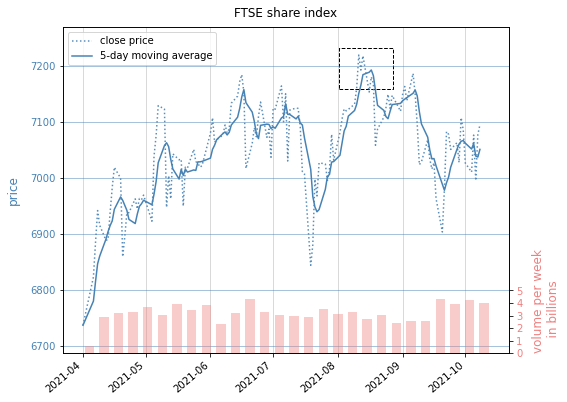

In [303]:
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(figsize=(8, 6))
   
ax.plot(date, close_price, c='steelblue', linestyle=':', alpha=0.9, label='close price', zorder=5)
ax.plot(date, close_price.rolling(5, min_periods=0).mean(), c='steelblue', label='5-day moving average', zorder=6)

August_highlight = plt.Rectangle((0.62, 0.81), 0.12, 0.125, fill=False, transform=ax.transAxes, linestyle='--')
ax.add_patch(August_highlight)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for label in ax.get_xticklabels():
    label.set(rotation=40, horizontalalignment='right')
    
ax.set_ylim(close_price.min() - 50, close_price.max() + 50)
ax.grid(axis='y', zorder=0, color='steelblue', alpha=0.6)
ax.grid(axis='x', zorder=0, alpha=0.6)
ax.tick_params(axis='y', labelcolor='steelblue')
ax.set_title('FTSE share index', pad=10.0)
ax.set_ylabel('price', labelpad=10, fontsize='large', c='steelblue')

ax_volume = ax.twinx()
ax_volume.bar(volume_per_week.index, volume_per_week, width=4.5, alpha=0.4, color='lightcoral', label='volume')

ax_volume.set_ylim(0, volume_per_week.max() * 6)
ax_volume.set_yticks(range(0, 6, 1))
ax_volume.tick_params(axis='y', labelcolor='lightcoral')
ax_volume.set_ylabel('volume per week\n    in billions', loc='bottom', labelpad=10, fontsize='large', c='lightcoral')

ax.legend()

Description: General trend - growth. The price stayed between 6700 and 7250 throughout the period of 7 months, which indicates a quite high stability of the index, however some significant price changes are noticeable. In the mid-July and the mid-September FTSE price dropped significantly, but recovered quickly and even reached the highest point in mid-August. Volume remained quite steady throughout the period, however it declined throughout the second part of the summer, but from the mid-September onwards have consistently reached about 4 billion.

### Adding all plots to one figure

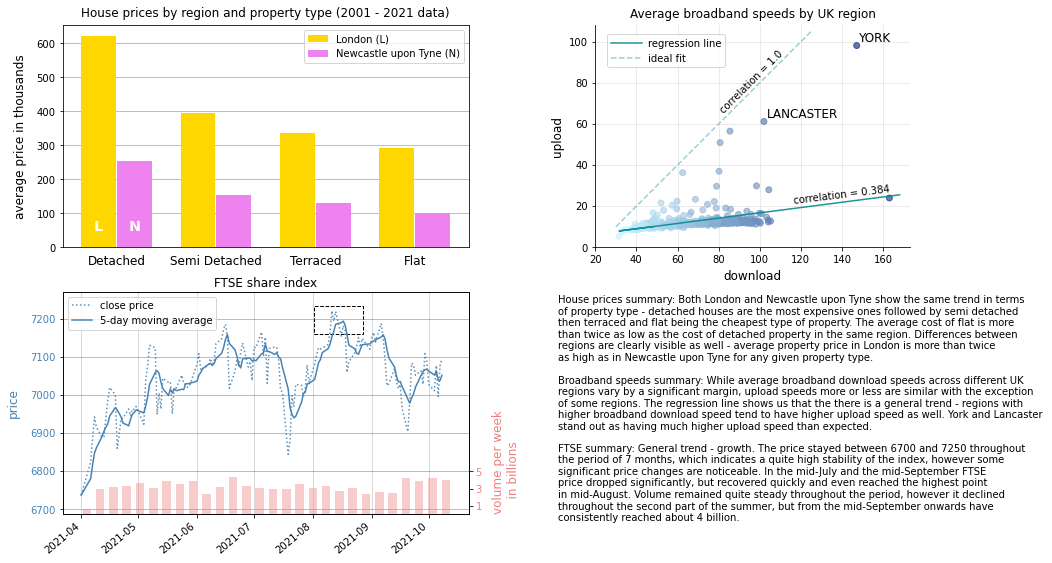

In [372]:
fig = plt.figure(figsize=(16, 9))

# House prices plot
ax1 = plt.subplot(2, 2, 1)

x_coords = pd.Series(range(n_property_types))
width = 0.35

ax1.grid(axis='y', zorder=0)

bars_London = ax1.bar(x_coords, prices_by_property_type_London.mean().sort_values(ascending=False), 
                     width, color='gold', zorder=5)
bars_Newcastle = ax1.bar(x_coords + width + 0.01, prices_by_property_type_Newcastle.mean().sort_values(ascending=False), 
                        width, color='violet', zorder=5)

ax1.set_title('House prices by region and property type (2001 - 2021 data)', pad=8)
ax1.set_ylabel('average price in thousands', fontsize='large', labelpad=10)
ax1.set_xticks(x_coords + (width + 0.01) / 2)
ax1.tick_params(bottom=False)
ax1.set_xticklabels(['Detached', 'Semi Detached', 'Terraced', 'Flat'], fontsize='large')

# Adjust to black and white printability and color blindness
ax1.text(x_coords[0] - 0.05, 50, 'L', c='white', fontsize='x-large', fontweight='bold', zorder=10)
ax1.text(x_coords[0] + width - 0.05, 50, 'N', c='white', fontsize='x-large', fontweight='bold', zorder=10)

ax1.legend((bars_London[0], bars_Newcastle[0]), ('London (L)', 'Newcastle upon Tyne (N)'))

# Broadband speeds plot
ax2 = plt.subplot(2, 2, 2)

ax2.grid(alpha=0.3, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(20, df_broadband_wrangled['averageDown'].max() + 10)
ax2.set_ylim(0, df_broadband_wrangled['averageUpload'].max() + 10)
ax2.scatter(df_broadband_wrangled['averageDown'], df_broadband_wrangled['averageUpload'], c=colours, 
                            cmap=cmap, alpha=0.6, zorder=5)

# Plot the regression line
ax2.plot(avg_down_for_regr, avg_down_for_regr * gradient + intercept, 
        zorder=10, color='darkcyan', label='regression line', alpha=0.9)

ax2.plot([30, 50, 70, 90, 110, 125], [10, 30, 50, 70, 90, 105], color='darkcyan', alpha=0.4, 
        linestyle='--', label='ideal fit')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Highlight York and Lancaster
ax2.annotate(YORK_row['laua_name'], (YORK_row['averageDown'] + 1, YORK_row['averageUpload'] + 2), fontsize='large')
ax2.annotate(LANCASTER_row['laua_name'], (LANCASTER_row['averageDown'] + 1.5, LANCASTER_row['averageUpload'] + 2), fontsize='large')

# Annotate regression line and ideal fit with their respective correlations
ax2.annotate('correlation = 1.0', (80.0, 65.0), rotation=45)
ax2.annotate(f'correlation = {avg_down_up_corr}', (116.0, 21.0), rotation=7)

ax2.set_title('Average broadband speeds by UK region', pad=7.0)
ax2.set_ylabel('upload', fontsize='large', labelpad=5)
ax2.set_xlabel('download', fontsize='large', labelpad=5)
ax2.legend(handletextpad=0.6, handlelength=3.1, loc='upper left', bbox_to_anchor=(0.02, 0.98))

# FTSE price plot
ax3 = plt.subplot(2, 2, 3)

ax3.plot(date, close_price, c='steelblue', linestyle=':', alpha=0.9, label='close price', zorder=5)
ax3.plot(date, close_price.rolling(5, min_periods=0).mean(), c='steelblue', label='5-day moving average', zorder=6)

August_highlight = plt.Rectangle((0.62, 0.81), 0.12, 0.125, fill=False, transform=ax3.transAxes, linestyle='--')
ax3.add_patch(August_highlight)

ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for label in ax3.get_xticklabels():
    label.set(rotation=40, horizontalalignment='right')
    
ax3.set_ylim(close_price.min() - 50, close_price.max() + 50)
ax3.grid(axis='y', zorder=0, color='steelblue', alpha=0.6)
ax3.grid(axis='x', zorder=0, alpha=0.6)
ax3.tick_params(axis='y', labelcolor='steelblue')
ax3.set_title('FTSE share index', pad=5.0)
ax3.set_ylabel('price', labelpad=10, fontsize='large', c='steelblue')

ax_volume = ax3.twinx()
ax_volume.bar(volume_per_week.index, volume_per_week, width=4.5, alpha=0.4, color='lightcoral', label='volume')

ax_volume.set_ylim(0, volume_per_week.max() * 6)
ax_volume.set_yticks(range(1, 6, 2))
ax_volume.tick_params(axis='y', labelcolor='lightcoral')
ax_volume.set_ylabel('volume per week\n    in billions', loc='bottom', labelpad=10, fontsize='large', c='lightcoral')

ax3.legend()

ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

house_prices_summary = """House prices summary: Both London and Newcastle upon Tyne show the same trend in terms 
of property type - detached houses are the most expensive ones followed by semi detached
then terraced and flat being the cheapest type of property. The average cost of flat is more 
than twice as low as the cost of detached property in the same region. Differences between 
regions are clearly visible as well - average property price in London is more than twice 
as high as in Newcastle upon Tyne for any given property type."""

broadband_speeds_summary = """Broadband speeds summary: While average broadband download speeds across different UK 
regions vary by a significant margin, upload speeds more or less are similar with the exception 
of some regions. The regression line shows us that the there is a general trend - regions with 
higher broadband download speed tend to have higher upload speed as well. York and Lancaster 
stand out as having much higher upload speed than expected."""

FTSE_summary = """FTSE summary: General trend - growth. The price stayed between 6700 and 7250 throughout 
the period of 7 months, which indicates a quite high stability of the index, however some 
significant price changes are noticeable. In the mid-July and the mid-September FTSE 
price dropped significantly, but recovered quickly and even reached the highest point 
in mid-August. Volume remained quite steady throughout the period, however it declined 
throughout the second part of the summer, but from the mid-September onwards have 
consistently reached about 4 billion."""

ax4.text(0.02, 0.69, house_prices_summary)
ax4.text(0.02, 0.38, broadband_speeds_summary)
ax4.text(0.02, -0.03, FTSE_summary)

plt.savefig('four_panel_plot.jpg', format='jpg', dpi=120)